# Josh Chung - Python APIs WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as matplot
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
longs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in lat_longs:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    country = citipy.nearest_city(coord[0], coord[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

714
714


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Zero counters
i=0
x=0

# Make API calls and write to CSV
with open('city_weather.csv', 'w') as data:
    data.write('city_name,country_name,latitude,longitude,temperature,humidity,cloudiness,wind_speed,retrieved'+'\n')
    for city in cities:
        try:
            city_data = requests.get(url+cities[i]+","+countries[i]+"&units=imperial"+"&appid="+api_key).json()
            city_name = cities[i]
            country_name = countries[i]
            latitude = city_data['coord']['lat']
            longitude = city_data['coord']['lon']
            temperature = city_data['main']['temp']
            humidity = city_data['main']['humidity']
            cloudiness = city_data['clouds']['all']
            wind_speed = city_data['wind']['speed']
            date = city_data['dt']
            data.write(f'{city_name},{country_name},{latitude},{longitude},{temperature},{humidity},{cloudiness},{wind_speed},{time.strftime("%m/%d/%Y", time.gmtime(date))}'+'\n')
            print(f'Retrieved {i+1} of {len(cities)} | {cities[i]}, {countries[i]}')
            i = i + 1
            x = x + 1
        except:
            print(f'Oops, nothing to see here for {cities[i]}, {countries[i]}, moving on.')
            i = i + 1
print(f'Data retrieval complete: {x} of {len(cities)} sucessfully retrieved.')
data.close()

Retrieved 1 of 714 | avarua, ck
Retrieved 2 of 714 | cape town, za
Retrieved 3 of 714 | puerto ayora, ec
Retrieved 4 of 714 | vaini, to
Retrieved 5 of 714 | shubarkuduk, kz
Retrieved 6 of 714 | albany, au
Retrieved 7 of 714 | atuona, pf
Oops, nothing to see here for illoqqortoormiut, gl, moving on.
Retrieved 9 of 714 | rikitea, pf
Retrieved 10 of 714 | chokurdakh, ru
Retrieved 11 of 714 | nizhniy kuranakh, ru
Retrieved 12 of 714 | ushuaia, ar
Retrieved 13 of 714 | carnarvon, au
Retrieved 14 of 714 | hobart, au
Oops, nothing to see here for mataura, pf, moving on.
Retrieved 16 of 714 | dikson, ru
Retrieved 17 of 714 | muros, es
Retrieved 18 of 714 | barrow, us
Retrieved 19 of 714 | thompson, ca
Retrieved 20 of 714 | maputo, mz
Retrieved 21 of 714 | waipawa, nz
Retrieved 22 of 714 | kahului, us
Retrieved 23 of 714 | manadhoo, mv
Retrieved 24 of 714 | bathsheba, bb
Retrieved 25 of 714 | lagoa, pt
Retrieved 26 of 714 | mildura, au
Retrieved 27 of 714 | tasiilaq, gl
Oops, nothing to see her

Retrieved 217 of 714 | samarai, pg
Retrieved 218 of 714 | teya, ru
Oops, nothing to see here for belushya guba, ru, moving on.
Oops, nothing to see here for umzimvubu, za, moving on.
Retrieved 221 of 714 | aksu, cn
Retrieved 222 of 714 | greece, us
Retrieved 223 of 714 | jutai, br
Retrieved 224 of 714 | sur, om
Retrieved 225 of 714 | puerto colombia, co
Retrieved 226 of 714 | khoy, ir
Retrieved 227 of 714 | turukhansk, ru
Retrieved 228 of 714 | macklin, ca
Retrieved 229 of 714 | hohhot, cn
Retrieved 230 of 714 | staunton, us
Retrieved 231 of 714 | ryotsu, jp
Retrieved 232 of 714 | flin flon, ca
Retrieved 233 of 714 | poum, nc
Retrieved 234 of 714 | kalmunai, lk
Retrieved 235 of 714 | lastoursville, ga
Retrieved 236 of 714 | lokosovo, ru
Retrieved 237 of 714 | smithers, ca
Retrieved 238 of 714 | deputatskiy, ru
Retrieved 239 of 714 | mercedes, ar
Retrieved 240 of 714 | kudahuvadhoo, mv
Retrieved 241 of 714 | port blair, in
Oops, nothing to see here for grand river south east, mu, moving

Retrieved 431 of 714 | bethel, us
Retrieved 432 of 714 | sobolevo, ru
Retrieved 433 of 714 | waren, de
Retrieved 434 of 714 | catuday, ph
Retrieved 435 of 714 | kaseda, jp
Retrieved 436 of 714 | gweta, bw
Retrieved 437 of 714 | cibeureum, id
Retrieved 438 of 714 | jacareacanga, br
Retrieved 439 of 714 | caramay, ph
Retrieved 440 of 714 | ladario, br
Oops, nothing to see here for keshan, cn, moving on.
Oops, nothing to see here for samusu, ws, moving on.
Oops, nothing to see here for tabiauea, ki, moving on.
Retrieved 444 of 714 | vangaindrano, mg
Retrieved 445 of 714 | henties bay, na
Retrieved 446 of 714 | bonham, us
Retrieved 447 of 714 | sisimiut, gl
Retrieved 448 of 714 | ledec, cz
Retrieved 449 of 714 | noumea, nc
Oops, nothing to see here for mutsamudu, km, moving on.
Retrieved 451 of 714 | longyearbyen, sj
Oops, nothing to see here for makung, tw, moving on.
Retrieved 453 of 714 | mao, td
Retrieved 454 of 714 | touros, br
Retrieved 455 of 714 | hambantota, lk
Retrieved 456 of 71

Retrieved 646 of 714 | nelson bay, au
Retrieved 647 of 714 | west wendover, us
Retrieved 648 of 714 | calamar, co
Retrieved 649 of 714 | baymak, ru
Retrieved 650 of 714 | tanabe, jp
Retrieved 651 of 714 | san andres, co
Retrieved 652 of 714 | dalvik, is
Retrieved 653 of 714 | yelanskiy, ru
Retrieved 654 of 714 | sola, vu
Retrieved 655 of 714 | ustka, pl
Retrieved 656 of 714 | vietri sul mare, it
Retrieved 657 of 714 | jacobina, br
Retrieved 658 of 714 | berlevag, no
Retrieved 659 of 714 | slave lake, ca
Retrieved 660 of 714 | luang prabang, la
Oops, nothing to see here for bolungarvik, is, moving on.
Retrieved 662 of 714 | horki, by
Retrieved 663 of 714 | schoneiche, de
Retrieved 664 of 714 | new baltimore, us
Retrieved 665 of 714 | galle, lk
Retrieved 666 of 714 | rodrigues alves, br
Retrieved 667 of 714 | port macquarie, au
Retrieved 668 of 714 | constitucion, mx
Retrieved 669 of 714 | tomatlan, mx
Retrieved 670 of 714 | panama city, us
Retrieved 671 of 714 | mayo, ca
Retrieved 672 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe from CSV
df = pd.DataFrame(pd.read_csv('city_weather.csv'))

# Drop values where humidity or cloudiness is reported at over 100% bc of weird API bug
df = df[df['humidity'] <= 100]
df = df[df['cloudiness'] <= 100]

# Print data counts to make sure over 500
print(df['city_name'].count())

# Preview data
df.head()

632


,city_name,country_name,latitude,longitude,temperature,humidity,cloudiness,wind_speed,retrieved
0,avarua,ck,-21.21,-159.78,78.80,74,92,13.87,03/16/2019
1,cape town,za,-33.93,18.42,70.68,60,0,6.93,03/16/2019
2,puerto ayora,ec,-0.74,-90.35,80.51,74,0,4.70,03/16/2019
3,vaini,to,-21.20,-175.20,73.40,100,20,3.36,03/16/2019
4,shubarkuduk,kz,49.15,56.49,36.64,52,48,13.11,03/16/2019


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

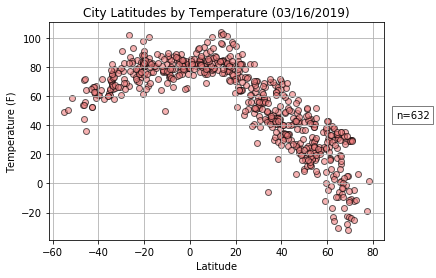

In [5]:
matplot.scatter(df['latitude'], df['temperature'], marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Temperature (F)')
matplot.title(f'City Latitudes by Temperature ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig1.png', bbox_inches="tight")
matplot.show()

#### Latitude vs. Humidity Plot

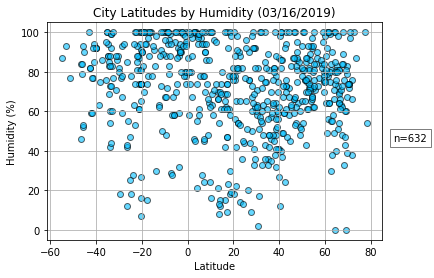

In [6]:
matplot.scatter(df['latitude'], df['humidity'], marker="o", facecolors="deepskyblue", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Humidity (%)')
matplot.title(f'City Latitudes by Humidity ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig2.png', bbox_inches="tight")
matplot.show()

#### Latitude vs. Cloudiness Plot

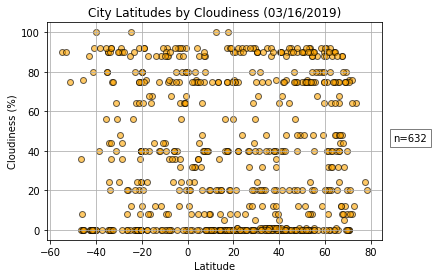

In [9]:
matplot.scatter(df['latitude'], df['cloudiness'], marker="o", facecolors="orange", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Cloudiness (%)')
matplot.title(f'City Latitudes by Cloudiness ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig3.png', bbox_inches="tight")
matplot.show()

#### Latitude vs. Wind Speed Plot

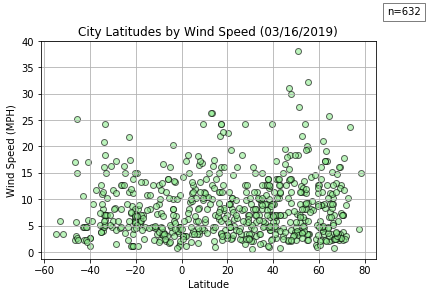

In [10]:
matplot.scatter(df['latitude'], df['wind_speed'], marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.6)
matplot.xlabel('Latitude')
matplot.ylabel('Wind Speed (MPH)')
matplot.title(f'City Latitudes by Wind Speed ({time.strftime("%m/%d/%Y", time.gmtime(date))})')
count = df['city_name'].count()
matplot.text(90,45, (f'n={count}'), bbox=dict(facecolor='white', alpha=0.5))
matplot.grid()
matplot.savefig('images/jchung_hw6_fig4.png', bbox_inches="tight")
matplot.show()

Observable trends:
1) There is a strong observable trend relating the latitude of a city to the temperature of a city. Generally speaking, the closer the city is to the equator (latitude 0), the hotter it is.
2) Surprisingly, there appears to be no observable relationship between latitude and humidity.
3) There appears to be no observable relationship between latitude and cloudiness.
4) There appears to be no observable relationship between latitude and wind speed.